In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import torch.nn.functional as F

warnings.filterwarnings('ignore')
os.makedirs('./figures', exist_ok=True)
os.makedirs('./results', exist_ok=True)
os.makedirs('./result/ftmle', exist_ok=True)

/home/isi/s-liu/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Ridgeline

In [2]:
fs = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

fs = np.around(fs, 2)

def construct_ftmle_df(fs, iteration):
    data_list = []
    for f in fs:
        filename = f'./result/ftmle/ftmle_f{f}_t{iteration}.npy'
        if os.path.exists(filename):
            data_list.append(np.load(filename))
        else:
            data_list.append(np.array([]))

    df_list = []
    for f, data in zip(fs, data_list):
        df = pd.DataFrame({
            'g': f,
            'x': data.flatten()
        })
        df_list.append(df)
    ftmle_df = pd.concat(df_list)
    return ftmle_df
    
def construct_untrained_ftmle_df(fs, iteration):
    data_list = []
    for f in fs:
        filename = f'./result/ftmle/untrained_ftmle_f{f}_t{iteration}.npy'
        if os.path.exists(filename):
            data_list.append(np.load(filename))
        else:
            data_list.append(np.array([]))

    df_list = []
    for f, data in zip(fs, data_list):
        df = pd.DataFrame({
            'g': f,
            'x': data.flatten()
        })
        df_list.append(df)
    ftmle_df = pd.concat(df_list)
    return ftmle_df

In [3]:
cmap = sns.color_palette('flare', as_cmap=True)
colors = cmap(np.linspace(0, 1, 20))
hex_colors = [mcolors.to_hex(color) for color in colors][::-1]
list_cmap = mcolors.ListedColormap(colors)

In [4]:
def plot_ridgeline(ftmle_df, iteration, cmap_name, scale_factors, x_min, x_max, save_name=None):
    fig, axes = plt.subplots(nrows=len(fs), figsize=(15, 0.7 * len(fs)))
    # pal = sns.cubehelix_palette(20, rot=-.25, light=.7, dark=0.2)[::-1]

    cmap = sns.color_palette(cmap_name, as_cmap=True)
    colors = cmap(np.linspace(0, 1, 20))
    hex_colors = [mcolors.to_hex(color) for color in colors][::-1]
    # x_min = ftmle_df['x'].min()
    # x_max = ftmle_df['x'].max()

    # Loop through each category
    for ax, f, color, scale_factor in zip(axes, fs, hex_colors, scale_factors):
        # fig.patch.set_alpha(0.0)
        ax.patch.set_alpha(0.0)
        data = ftmle_df[ftmle_df['g'] == f]['x']
        
        bw_adjust_value = 0.8
        alpha_value = 1
        linewidth_value = 1.5
        
        sns.kdeplot(data, ax=ax, color=color,
                    bw_adjust=bw_adjust_value, clip_on=True,
                    fill=True, alpha=alpha_value, linewidth=linewidth_value)
        sns.kdeplot(data, ax=ax,
                    bw_adjust=bw_adjust_value, clip_on=True, color='black',
                    alpha=alpha_value, linewidth=linewidth_value)
        
        if f * 10 % 2 == 0 or f == 0.1:
            ax.text(-.08, .2, f, color='black', fontsize=46,
                    ha='left', va='center', transform=ax.transAxes)
        
        if ax.collections:
            filled_line = ax.collections[0]
            line_kde = ax.get_lines()[0]
            y_data = line_kde.get_ydata()

            # Adjust the height of the KDE plots by multiplying the y-values
            y_data_scaled = y_data * scale_factor

            # Set the scaled y-values back to the lines
            line_kde.set_ydata(y_data_scaled)

            # Adjust the filled region
            for path in filled_line.get_paths():
                vertices = path.vertices
                vertices[:, 1] *= scale_factor
            
        ax.set_xlim([x_min-0.02, x_max+0.02])
        ax.set_title(None)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        if f != 8.0:
            ax.set_xticks([])
        else:
            # ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
            ax.set_xticks([-1, 0, 1, 2, 3, 4, 5])
        ax.set_yticks([])
        ax.tick_params(axis='x', labelsize=46)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    fig.subplots_adjust(hspace=-.6)

    # plt.show()
    if save_name:
        fig.savefig(f'./figures/{save_name}.eps', format='eps')

In [5]:
ftmle_dfs = []
for t in [2.5, 5]:
    ftmle_dfs.append(construct_ftmle_df(fs, iteration=t))

In [6]:
mean_val = []
for f in fs:
    filename = f'./result/ftmle/ftmle_f{f}_t{5}.npy'
    if os.path.exists(filename):
        val = np.mean(np.load(filename))
        print(f, val)
        mean_val.append(val)
# mean_val

0.1 1.4282753
0.5 0.31629494
1.0 0.57785463
1.5 0.43420625
2.0 0.69440895
2.5 0.77762794
3.0 0.87354475
3.5 0.9490574
4.0 1.0774101
4.5 1.2986188
5.0 1.5191275
5.5 1.874684
6.0 2.2254398
6.5 2.8149865
7.0 3.24031232038361
7.5 3.715638068060521
8.0 5.066289563414342


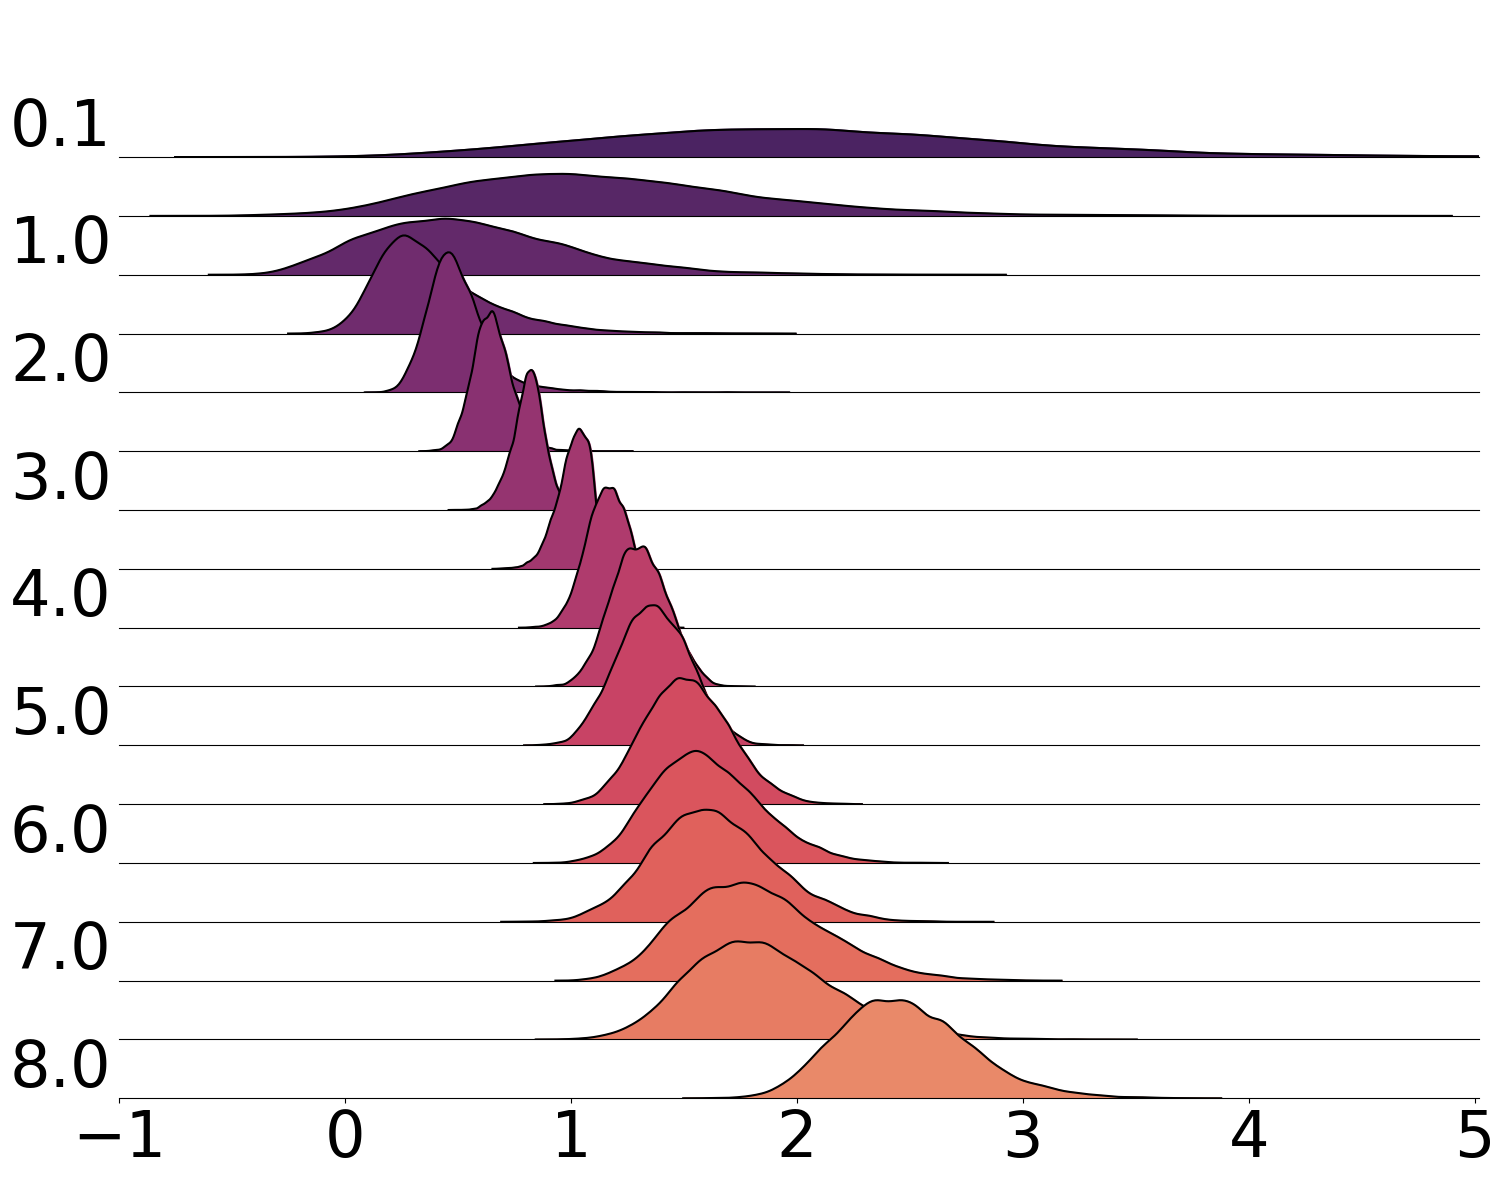

In [7]:
scale_factors = [0.2, 0.3, 0.4, 0.7, 1, 1, 1, 1, 1, 1, 1, 0.9, 0.8, 0.8, 0.7, 0.7, 0.7]
plot_ridgeline(ftmle_dfs[0], iteration=2.5, cmap_name='flare', scale_factors=scale_factors, x_min=-0.4, x_max=5, save_name='lorenz_ftmle_t2.5_rigeline')

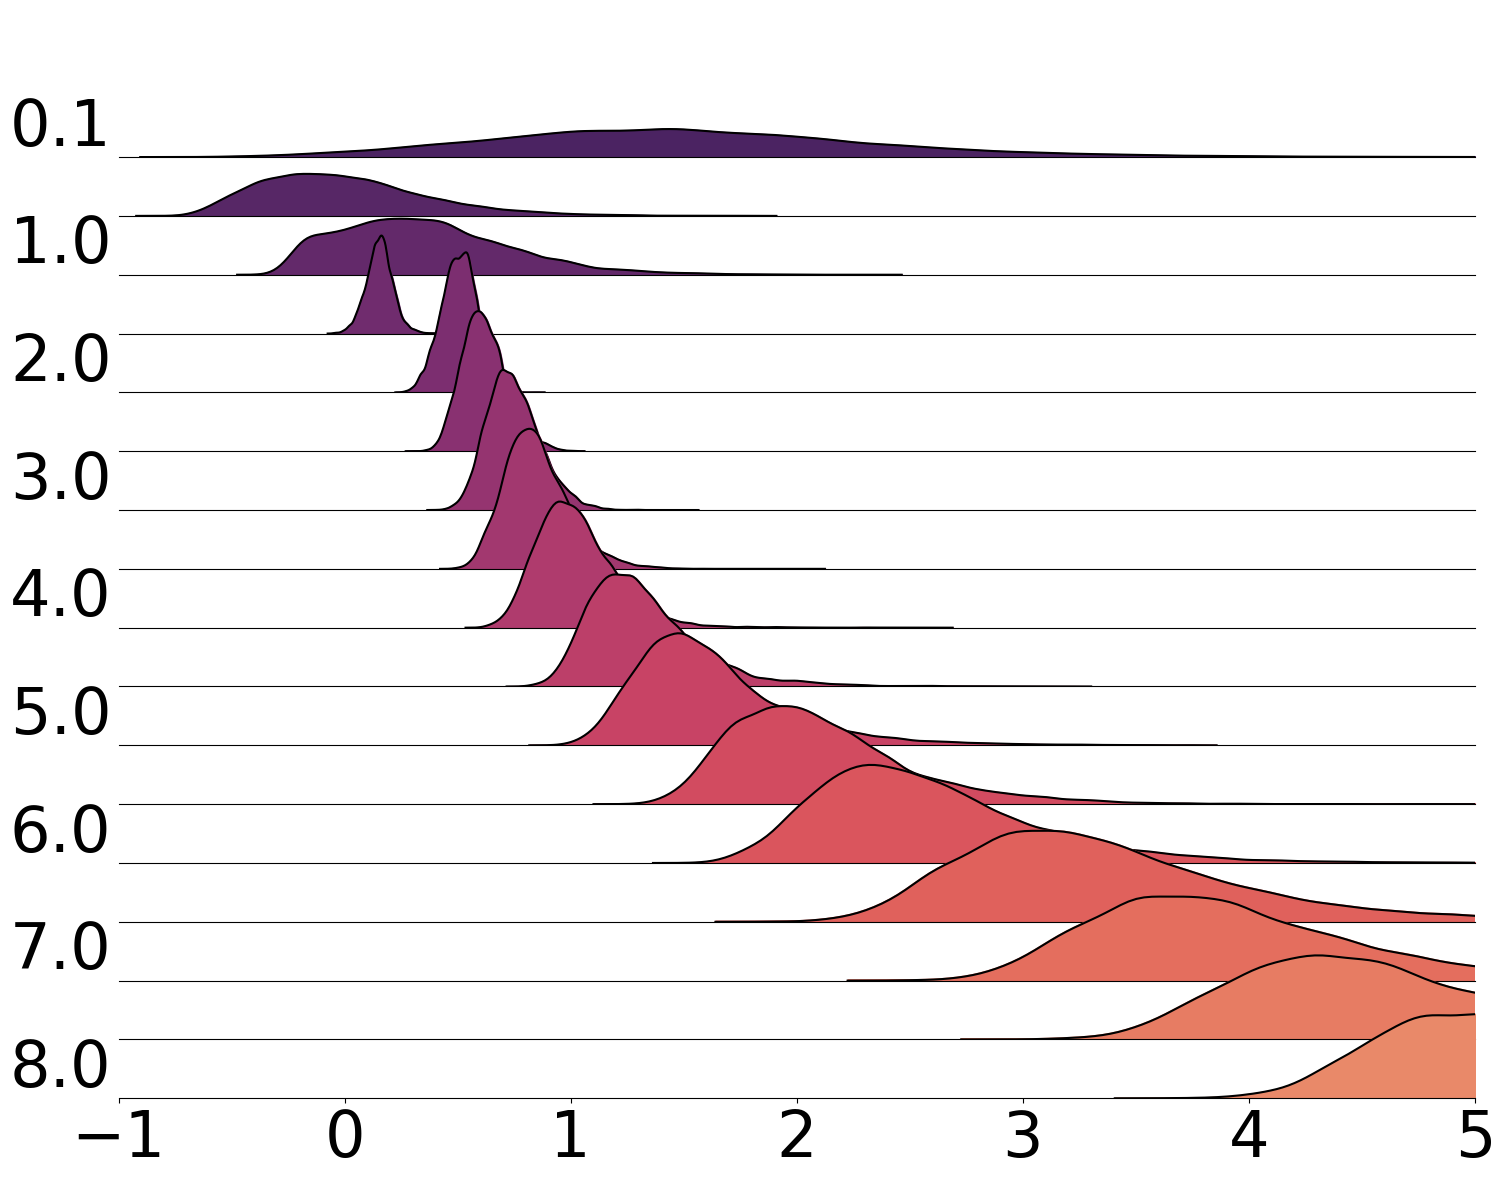

In [8]:
scale_factors = [0.2, 0.3, 0.4, 0.7, 1, 1, 1, 1, 0.9, 0.8, 0.8, 0.7, 0.7, 0.65, 0.6, 0.6, 0.6]
plot_ridgeline(ftmle_dfs[1], iteration=5, cmap_name='flare', scale_factors=scale_factors, x_min=-0.4, x_max=4, save_name='lorenz_ftmle_t5.0_rigeline')

### Untrained Ridgeline

In [9]:
ftmle_dfs = []
for t in [2.5, 5]:
    ftmle_dfs.append(construct_untrained_ftmle_df(fs, iteration=t))

#### T=2.5

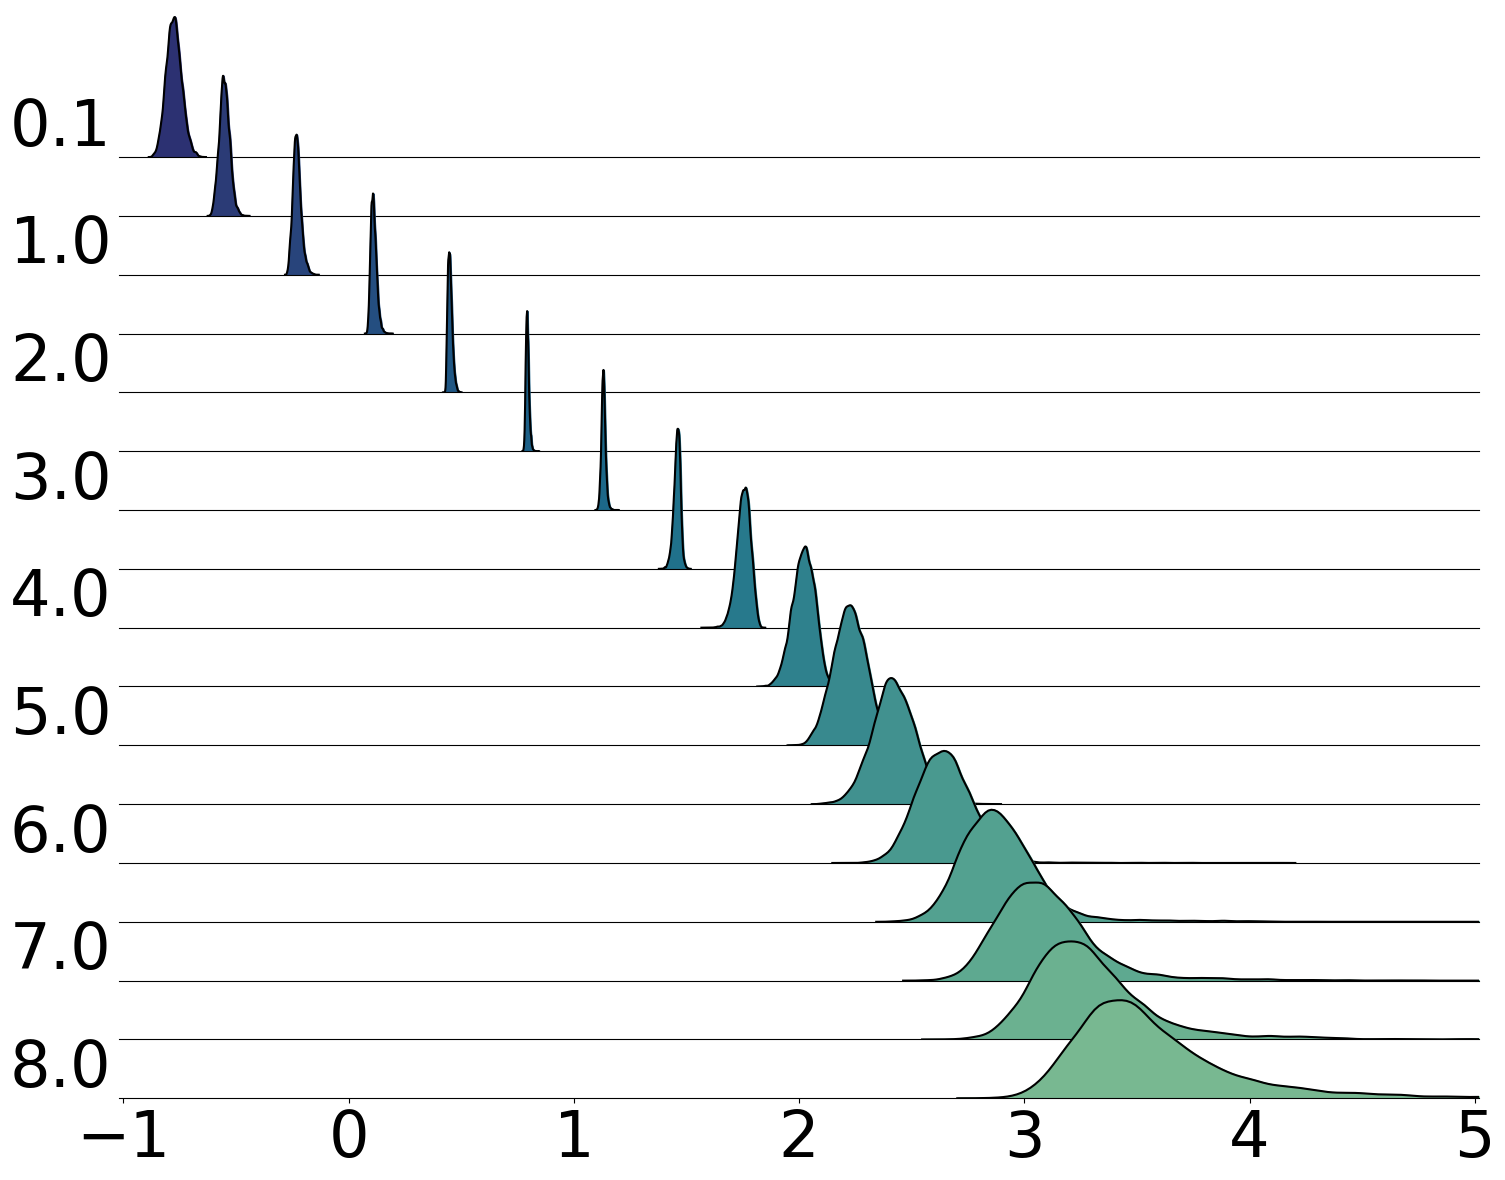

In [10]:
scale_factors = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9, 0.8, 0.8, 0.7, 0.7, 0.7]
plot_ridgeline(ftmle_dfs[0], iteration=2.5, cmap_name='crest', scale_factors=scale_factors, x_min=-1, x_max=5, save_name='lorenz_untrained_ftmle_t2.5_rigeline')

#### T=5

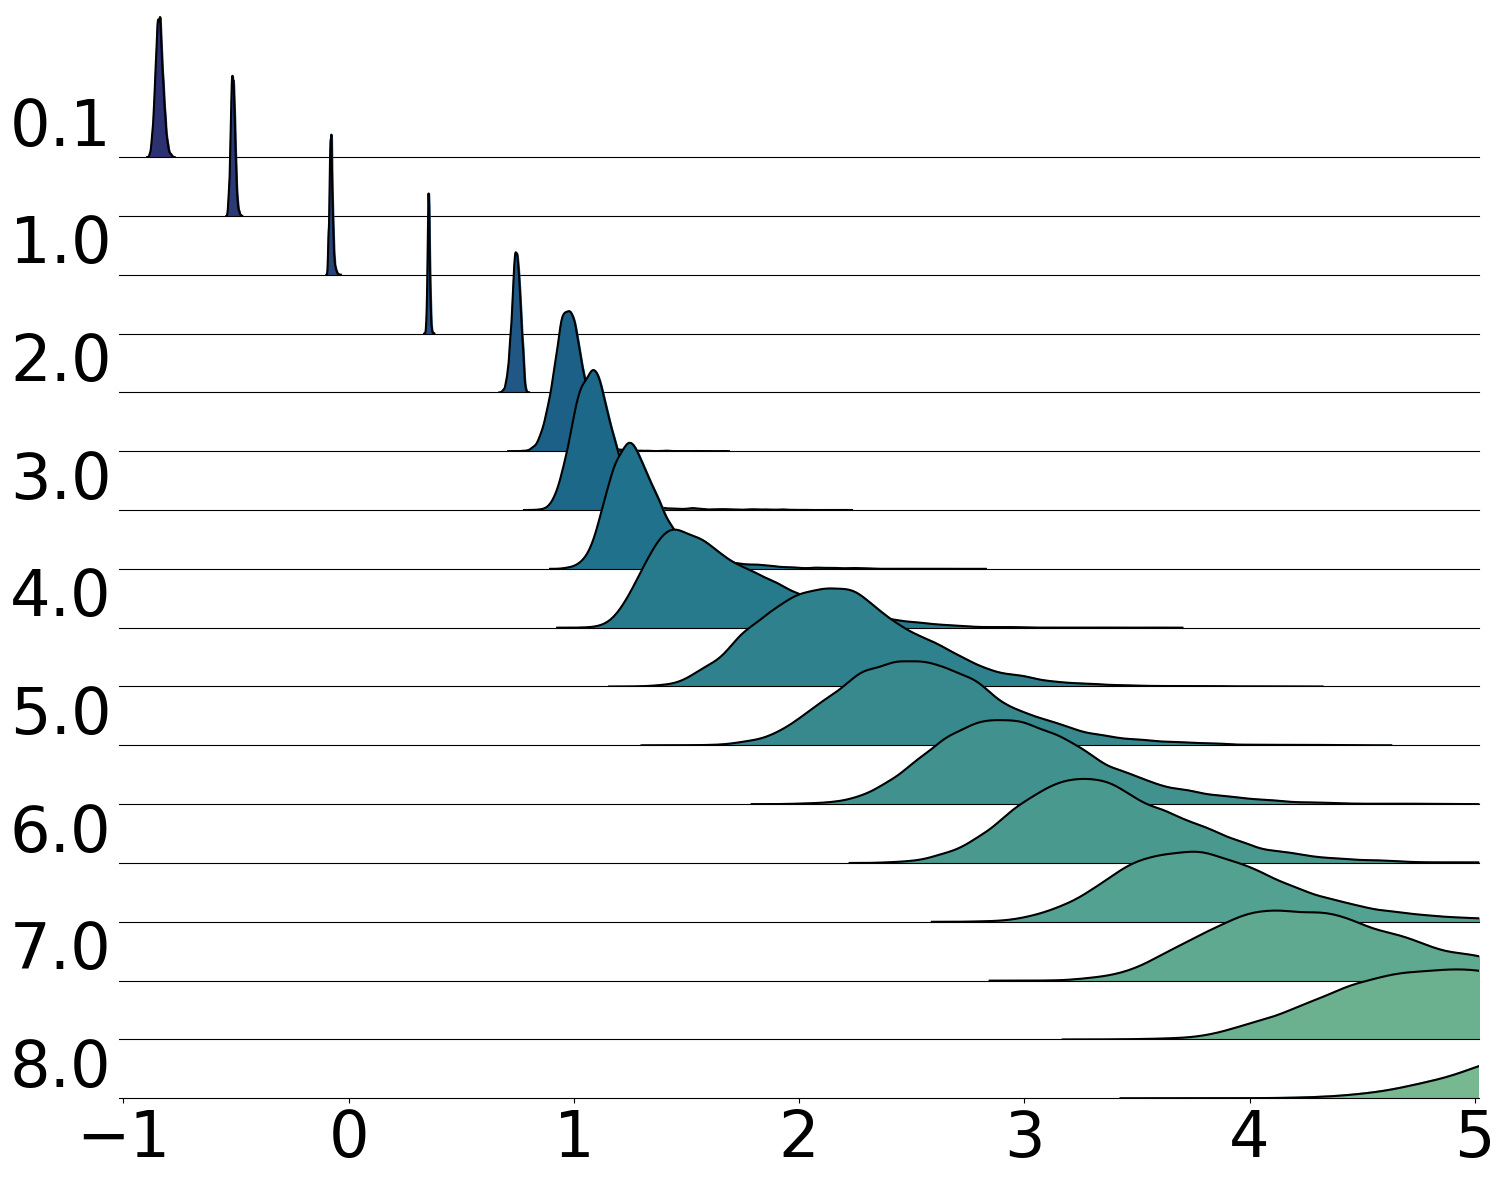

In [11]:
scale_factors = [1, 1, 1, 1, 1, 1, 1, 0.9, 0.7, 0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5]
plot_ridgeline(ftmle_dfs[1], iteration=5, cmap_name='crest', scale_factors=scale_factors, x_min=-1, x_max=5, save_name='lorenz_untrained_ftmle_t5_rigeline')

### FTMLE Distribution

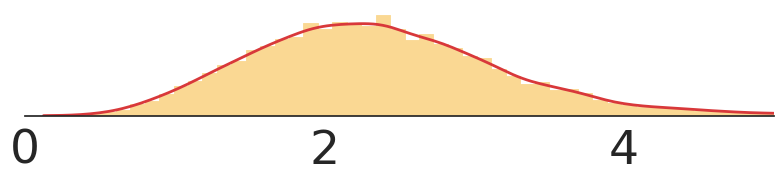

In [13]:
rho06_ftmle = np.load(f'./result/ftmle/ftmle_f0.1_t2.5.npy')

plt.figure(figsize=(8, 2))
sns.set_context("paper")
sns.set_theme(style="white", palette=None)

g = sns.histplot(data=rho06_ftmle, kde=True, line_kws={'lw': 2}, color='#d8383a', bins=64)

for rec in g.patches:
    if rec.xy[0] < 0:
        rec.set_color('#c4dfd8')
    else:
        rec.set_color('#fad893')

g.set_xlim(0,5)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)
g.get_yaxis().set_visible(False)
g.set_xticks([0, 2, 4])
g.set_xticklabels(g.get_xticklabels(), fontsize=34)
# g.set_yticklabels(g.get_yticklabels(), fontsize=20)
plt.tight_layout()
plt.savefig(f'./figures/lorenz_f0.1_t2.5_ftmle.eps', format='eps')
plt.savefig(f'./figures/lorenz_f0.1_t2.5_ftmle.png', format='png')

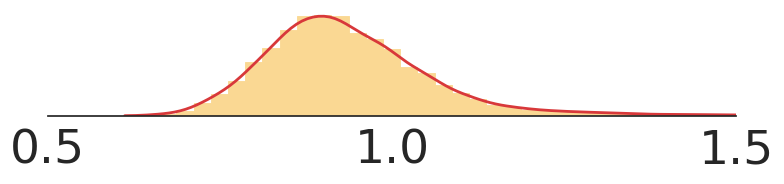

In [14]:
rho06_ftmle = np.load(f'./result/ftmle/ftmle_f2.0_t2.5.npy')

plt.figure(figsize=(8, 2))
sns.set_context("paper")
sns.set_theme(style="white", palette=None)

g = sns.histplot(data=rho06_ftmle, kde=True, line_kws={'lw': 2}, color='#d8383a', bins=64)

for rec in g.patches:
    if rec.xy[0] < 0:
        rec.set_color('#c4dfd8')
    else:
        rec.set_color('#fad893')

g.set_xlim(0.5, 1.5)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)
g.get_yaxis().set_visible(False)
g.set_xticks([0.5, 1, 1.5])
g.set_xticklabels(g.get_xticklabels(), fontsize=34)
# g.set_yticklabels(g.get_yticklabels(), fontsize=20)
plt.tight_layout()
plt.savefig(f'./figures/lorenz_f2.0_t2.5_ftmle.eps', format='eps')
plt.savefig(f'./figures/lorenz_f2.0_t2.5_ftmle.png', format='png')

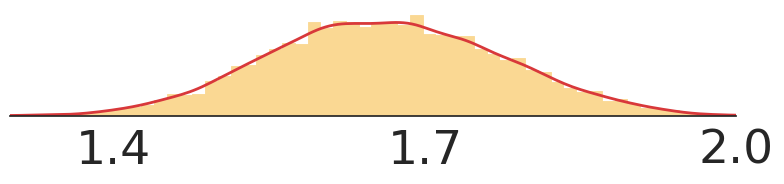

In [15]:
rho06_ftmle = np.load(f'./result/ftmle/ftmle_f4.5_t2.5.npy')

plt.figure(figsize=(8, 2))
sns.set_context("paper")
sns.set_theme(style="white", palette=None)

g = sns.histplot(data=rho06_ftmle, kde=True, line_kws={'lw': 2}, color='#d8383a', bins=64)

for rec in g.patches:
    if rec.xy[0] < 0:
        rec.set_color('#c4dfd8')
    else:
        rec.set_color('#fad893')

g.set_xlim(1.3, 2)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)
g.get_yaxis().set_visible(False)
g.set_xticks([1.4, 1.7, 2])
g.set_xticklabels(g.get_xticklabels(), fontsize=34)
# g.set_yticklabels(g.get_yticklabels(), fontsize=20)
plt.tight_layout()
plt.savefig(f'./figures/lorenz_f4.5_t2.5_ftmle.eps', format='eps')
plt.savefig(f'./figures/lorenz_f4.5_t2.5_ftmle.png', format='png')